##Загрузка и исследование данных

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.preprocessing import OneHotEncoder

In [2]:
from google.colab import drive

# Подключение Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import zipfile

# Путь к ZIP-файлу в Google Colab
zip_path = '/content/drive/MyDrive/archive.zip'

# Путь, куда вы хотите извлечь файлы
extract_path = '/content/'

# Разархивация
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f'Файлы извлечены в {extract_path}')

Файлы извлечены в /content/


In [4]:
df=pd.read_csv("/content/Customer-Churn-Records.csv")

In [5]:
df.isna().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [8]:

df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [9]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [10]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [11]:
df[['Exited']].value_counts() #надо делать oversampling

,count
Exited,
0,7962
1,2038


##Анализ данных

### Информация

### Gender
- У женщин-клиентов более высокий уровень оттока (25,07%), чем у мужчин-клиентов (16,47%). Это говорит о том, что пол может играть роль в оттоке клиентов, поскольку женщины-клиенты с большей вероятностью уходят.

### Geography
- Показатели оттока различаются в разных странах: самый высокий показатель оттока в Германии (32,44%), за ней следуют Испания (16,67%) и Франция (16,17%). Это показывает, что география может влиять на тенденции оттока.

### Number of Products
- Клиенты с 4 продуктами имеют 100% отток, хотя эта группа небольшая. Клиенты с 1 продуктом имеют отток 27,71%, что указывает на то, что меньшее количество продуктов связано с более высоким оттоком. Те, у кого 2 продукта, имеют более низкий отток (7,60%).

### Credit Score
- Средний кредитный рейтинг ушедших клиентов немного ниже (645,41) по сравнению с теми, кто остался (651,84). Это может указывать на связь между более низкими кредитными рейтингами и более высоким риском оттока.

### Card Type
- Показатели оттока одинаковы для всех типов карт (DIAMOND, GOLD, SILVER, PLATINUM), что свидетельствует о том, что тип карты не оказывает существенного влияния на отток.

### Tenure
- Клиенты со сроком владения 0 месяцев имеют самый высокий уровень оттока (23,00%), а клиенты со сроком владения 7 месяцев имеют самый низкий уровень оттока (17,22%). Более короткие периоды владения, как правило, показывают более высокий уровень оттока.

### Balance
- Средний баланс у отошедших клиентов (91109,48) выше, чем у оставшихся (72742,75), что говорит о том, что клиенты с более высокими балансами могут быть более склонны к оттоку.

### Age
- Средний возраст клиентов, которые ушли, немного выше (44,84), чем у тех, кто не ушел (37,41). Это говорит о том, что клиенты постарше могут быть немного более склонны к уходу.

### Complaint
- Клиенты, подавшие жалобы (Жалоба: 1), демонстрируют очень высокий уровень оттока (99,51%), в то время как у тех, у кого нет жалоб (Жалоба: 0), наблюдается очень низкий уровень оттока (0,05%). Это показывает, что жалобы являются сильным предиктором оттока.


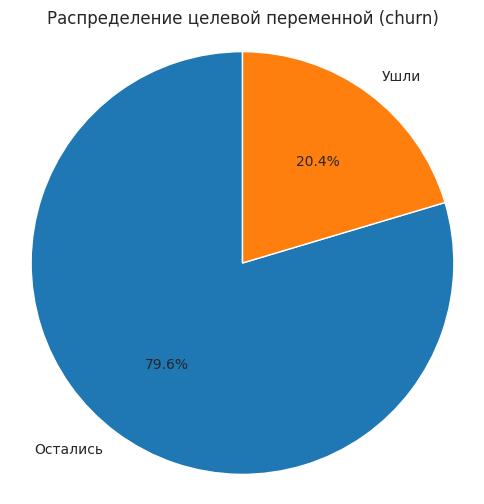

In [33]:
plt.figure(figsize=(6, 6))
churn_counts = df['Exited'].value_counts()
plt.pie(churn_counts, labels=['Остались', 'Ушли'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Распределение целевой переменной (churn)')
plt.show()

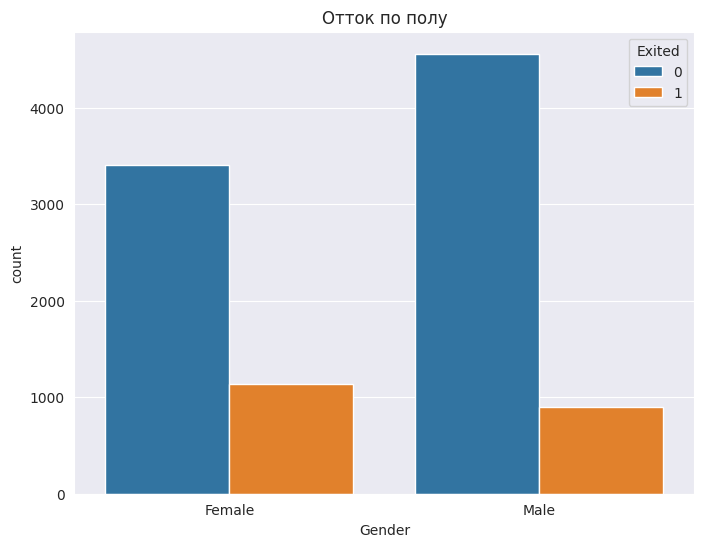

In [35]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Exited', data=df)
plt.title('Отток по полу')
plt.show()

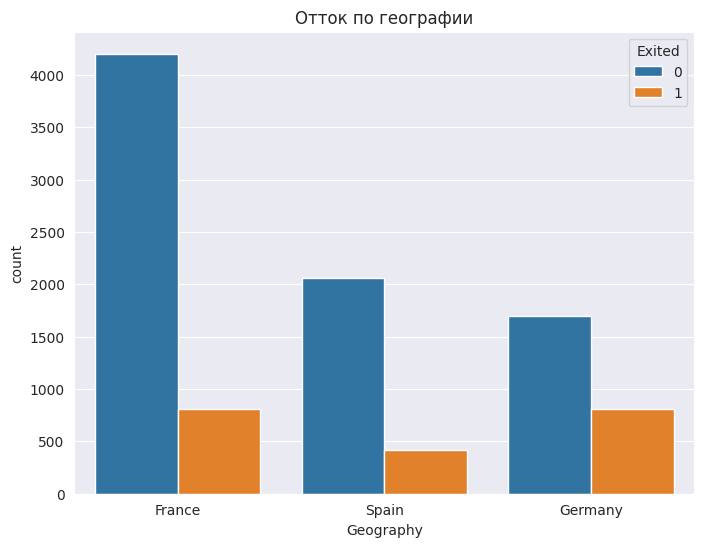

In [26]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Geography', hue='Exited', data=df)
plt.title('Отток по географии')
plt.show()

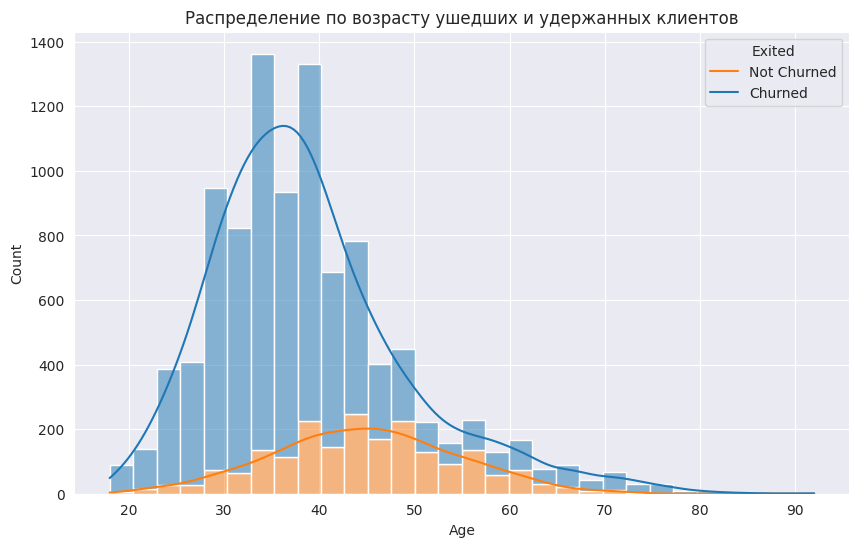

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(df, x='Age', hue='Exited', multiple='stack', bins=30, kde=True)
plt.title('Распределение по возрасту ушедших и удержанных клиентов')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Exited', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()

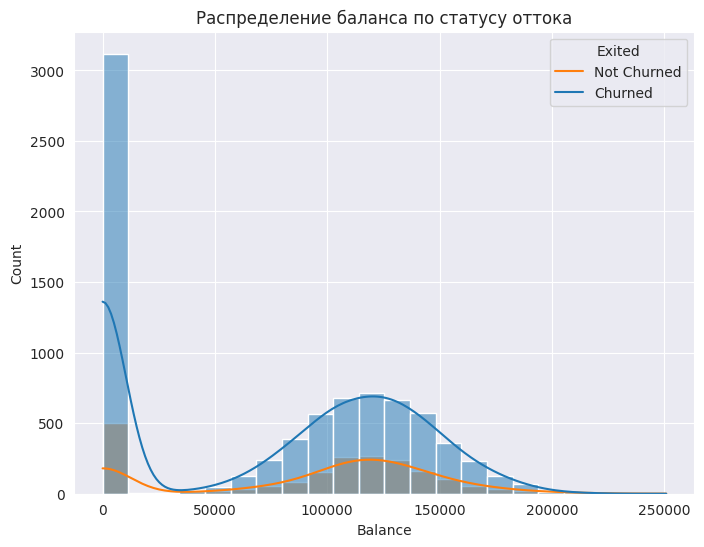

In [28]:
plt.figure(figsize=(8, 6))
sns.histplot(df, x='Balance', hue='Exited', kde=True)
plt.title('Распределение баланса по статусу оттока')
plt.xlabel('Balance')
plt.ylabel('Count')
plt.legend(title='Exited', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()

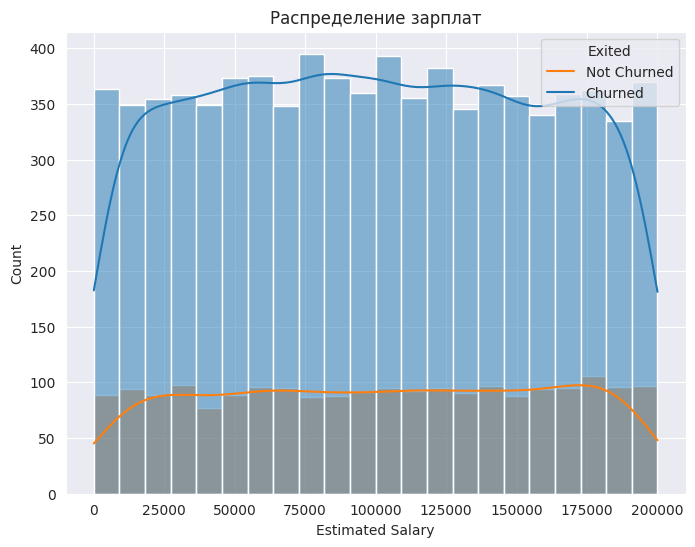

In [29]:
plt.figure(figsize=(8, 6))
sns.histplot(df, x='EstimatedSalary', hue='Exited', kde=True)
plt.title('Распределение зарплат')
plt.xlabel('Estimated Salary')
plt.ylabel('Count')
plt.legend(title='Exited', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()

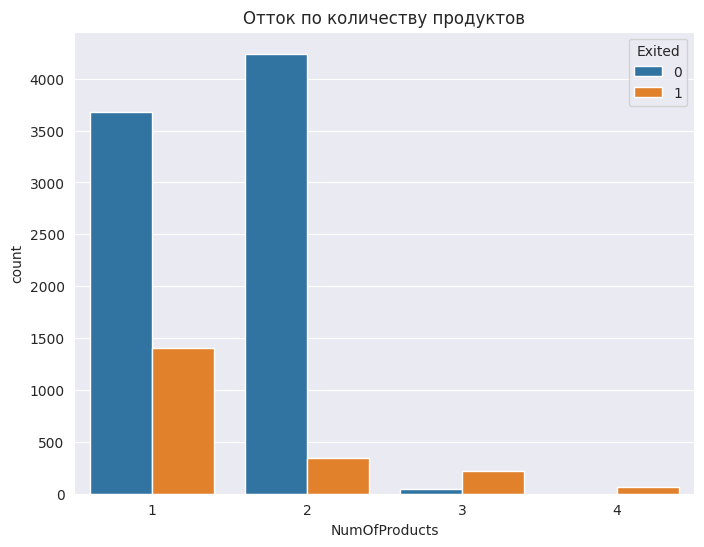

In [30]:
plt.figure(figsize=(8, 6))
sns.countplot(x='NumOfProducts', hue='Exited', data=df)
plt.title('Отток по количеству продуктов')
plt.show()

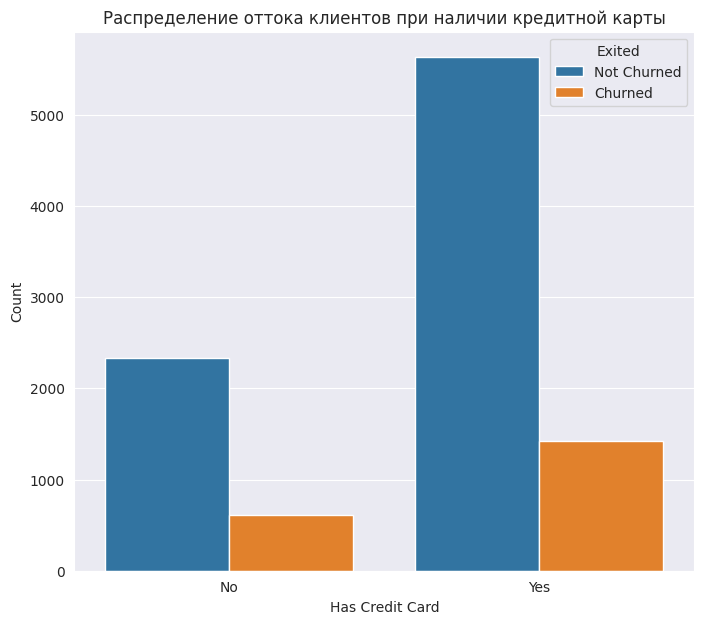

In [31]:
plt.figure(figsize=(8, 7))
sns.countplot(data=df, x='HasCrCard', hue='Exited')
plt.title('Распределение оттока клиентов при наличии кредитной карты')
plt.xlabel('Has Credit Card')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])  # Set x-axis labels as 'No' and 'Yes'
plt.legend(title='Exited', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()

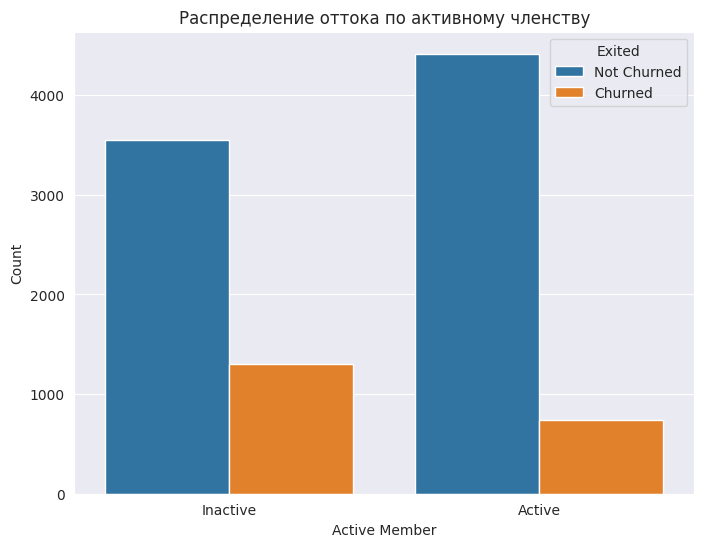

In [32]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='IsActiveMember', hue='Exited')
plt.title('Распределение оттока по активному членству')
plt.xlabel('Active Member')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Inactive', 'Active'])  # Set x-axis labels
plt.legend(title='Exited', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()

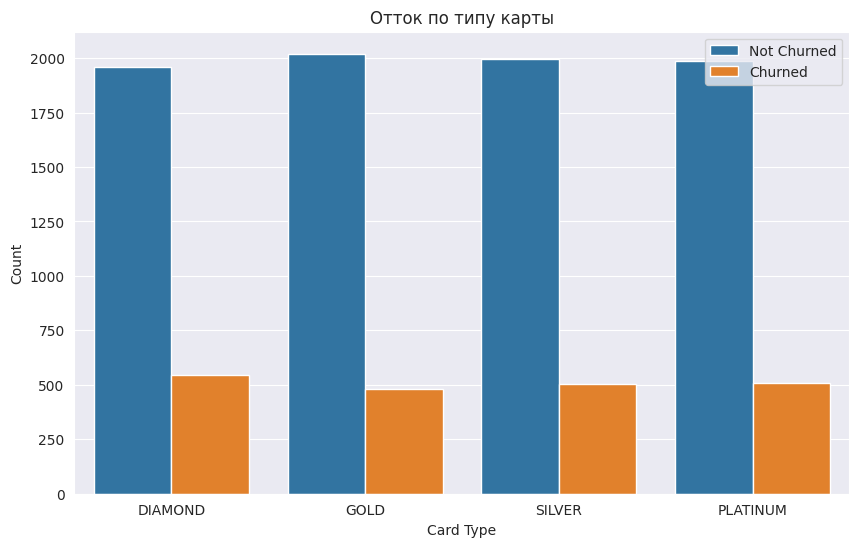

In [36]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Card Type', hue='Exited')
plt.xlabel('Card Type')
plt.ylabel('Count')
plt.title('Отток по типу карты')
plt.legend(['Not Churned', 'Churned'])
plt.show()

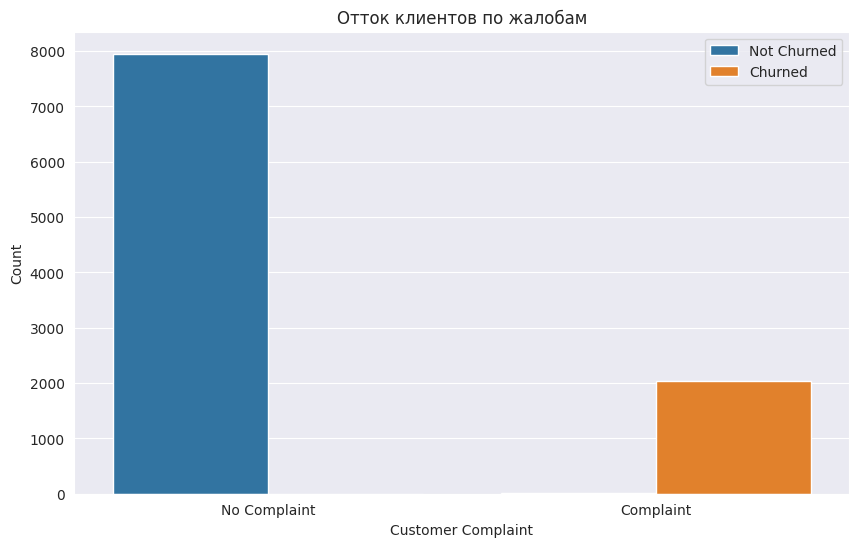

In [37]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Complain', hue='Exited')
plt.xlabel('Customer Complaint')
plt.ylabel('Count')
plt.title('Отток клиентов по жалобам')
plt.legend(['Not Churned', 'Churned'])
plt.xticks([0, 1], ['No Complaint', 'Complaint'])
plt.show()

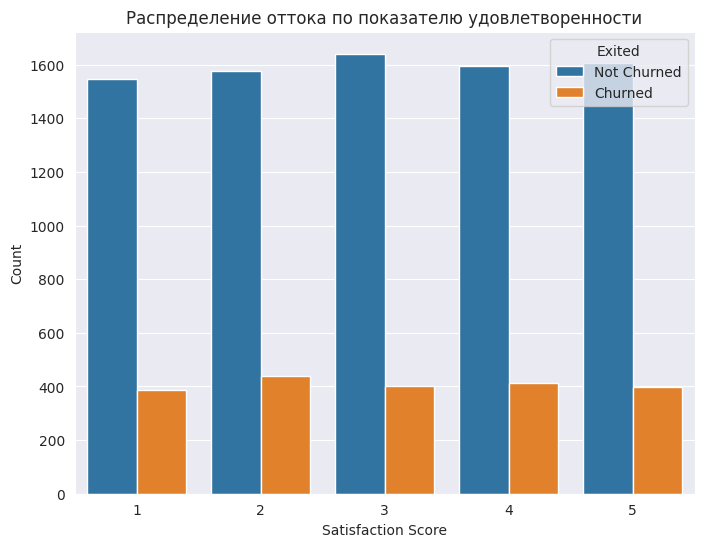

In [38]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Satisfaction Score', hue='Exited', order=[1, 2, 3, 4, 5])
plt.title('Распределение оттока по показателю удовлетворенности')
plt.xlabel('Satisfaction Score')
plt.ylabel('Count')
plt.legend(title='Exited', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()

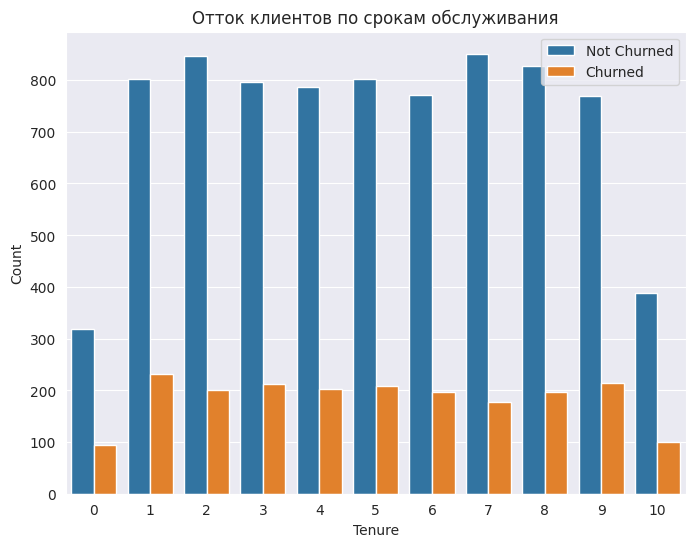

In [39]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Tenure', hue='Exited')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.title('Отток клиентов по срокам обслуживания')
plt.legend(['Not Churned', 'Churned'])
plt.show()

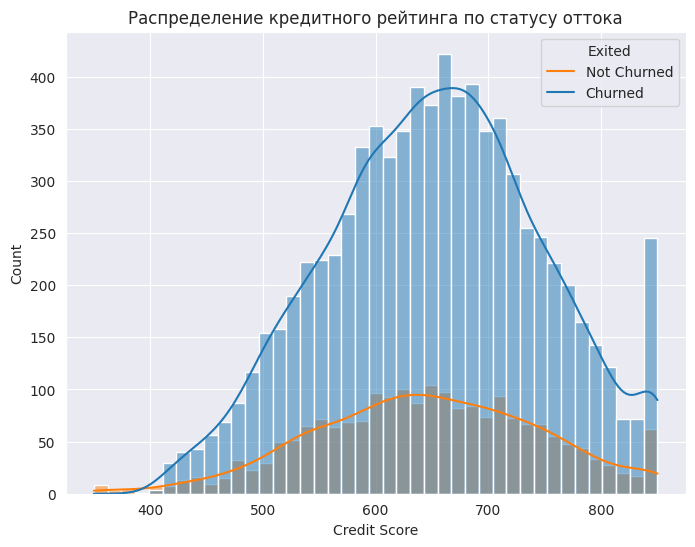

In [40]:
plt.figure(figsize=(8, 6))
sns.histplot(df, x='CreditScore', hue='Exited', kde=True)
plt.title('Распределение кредитного рейтинга по статусу оттока')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.legend(title='Exited', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()

In [41]:
gender_churn_counts = df.groupby(['Gender', 'Exited']).size().unstack()
for gender in df['Gender'].unique():
    total_customers = gender_churn_counts.loc[gender].sum()
    churn_rate = gender_churn_counts.loc[gender][1] / total_customers
    print(f'Churn Rate - {gender}: {churn_rate:.2%}')

Churn Rate - Female: 25.07%
Churn Rate - Male: 16.47%


In [42]:
geography_churn_counts = df.groupby(['Geography', 'Exited']).size().unstack()
for country in df['Geography'].unique():
    total_customers = geography_churn_counts.loc[country].sum()
    churn_rate = geography_churn_counts.loc[country][1] / total_customers
    print(f'Churn Rate - {country}: {churn_rate:.2%}')

Churn Rate - France: 16.17%
Churn Rate - Spain: 16.67%
Churn Rate - Germany: 32.44%


In [43]:
churn_rate_age = df.groupby('Age')['Exited'].mean()
print(churn_rate_age)

Age
18    0.090909
19    0.037037
20    0.050000
21    0.056604
22    0.142857
        ...   
83    0.000000
84    0.500000
85    0.000000
88    0.000000
92    0.000000
Name: Exited, Length: 70, dtype: float64


In [44]:
num_of_products_churn_counts = df.groupby(['NumOfProducts', 'Exited']).size().unstack()
for num_products in df['NumOfProducts'].unique():
    total_customers = num_of_products_churn_counts.loc[num_products].sum()
    churn_rate = num_of_products_churn_counts.loc[num_products][1] / total_customers
    print(f'Churn Rate - {num_products} Products: {churn_rate:.2%}')

Churn Rate - 1 Products: 27.71%
Churn Rate - 3 Products: 82.71%
Churn Rate - 2 Products: 7.60%
Churn Rate - 4 Products: 100.00%


In [45]:
credit_score_churn_counts = df.groupby(['Exited'])['CreditScore']
churn_rate = (credit_score_churn_counts.sum() / credit_score_churn_counts.count()).tolist()
print(f'Churn Rate - Not Churned: {churn_rate[0]:.2f}')
print(f'Churn Rate - Churned: {churn_rate[1]:.2f}')

Churn Rate - Not Churned: 651.84
Churn Rate - Churned: 645.41


In [46]:
card_type_churn_counts = df.groupby(['Card Type', 'Exited']).size().unstack()
for card_type in df['Card Type'].unique():
    total_customers = card_type_churn_counts.loc[card_type].sum()
    churn_rate = card_type_churn_counts.loc[card_type][1] / total_customers
    print(f'Churn Rate - {card_type}: {churn_rate:.2%}')

Churn Rate - DIAMOND: 21.78%
Churn Rate - GOLD: 19.26%
Churn Rate - SILVER: 20.11%
Churn Rate - PLATINUM: 20.36%


In [47]:
balance_churn_counts = df.groupby(['Exited'])['Balance']
churn_rate = (balance_churn_counts.sum() / balance_churn_counts.count()).tolist()
print(f'Churn Rate - Not Churned: {churn_rate[0]:.2f}')
print(f'Churn Rate - Churned: {churn_rate[1]:.2f}')

Churn Rate - Not Churned: 72742.75
Churn Rate - Churned: 91109.48


In [48]:
age_churn_counts = df.groupby(['Exited'])['Age']
churn_rate = (age_churn_counts.sum() / age_churn_counts.count()).tolist()
print(f'Churn Rate - Not Churned: {churn_rate[0]:.2f}')
print(f'Churn Rate - Churned: {churn_rate[1]:.2f}')

Churn Rate - Not Churned: 37.41
Churn Rate - Churned: 44.84


In [49]:
complaint_churn_counts = df.groupby(['Complain', 'Exited']).size().unstack()
for complaint in df['Complain'].unique():
    total_customers = complaint_churn_counts.loc[complaint].sum()
    churn_rate = complaint_churn_counts.loc[complaint][1] / total_customers
    print(f'Churn Rate - Complaint: {complaint} - {churn_rate:.2%}')

Churn Rate - Complaint: 1 - 99.51%
Churn Rate - Complaint: 0 - 0.05%


In [50]:
churned_count = df[df['Exited'] == 1]['Exited'].count()
not_churned_count = df[df['Exited'] == 0]['Exited'].count()

print(f'Number of Customers Churned: {churned_count}')
print(f'Number of Customers Not Churned: {not_churned_count}')

Number of Customers Churned: 2038
Number of Customers Not Churned: 7962


In [51]:
tenure_churn_counts = df.groupby(['Tenure', 'Exited']).size().unstack()
for tenure in df['Tenure'].unique():
    total_customers = tenure_churn_counts.loc[tenure].sum()
    churn_rate = tenure_churn_counts.loc[tenure][1] / total_customers
    print(f'Churn Rate - Tenure {tenure}: {churn_rate:.2%}')

Churn Rate - Tenure 2: 19.18%
Churn Rate - Tenure 1: 22.42%
Churn Rate - Tenure 8: 19.22%
Churn Rate - Tenure 7: 17.22%
Churn Rate - Tenure 4: 20.53%
Churn Rate - Tenure 6: 20.27%
Churn Rate - Tenure 3: 21.11%
Churn Rate - Tenure 10: 20.61%
Churn Rate - Tenure 5: 20.65%
Churn Rate - Tenure 9: 21.75%
Churn Rate - Tenure 0: 23.00%


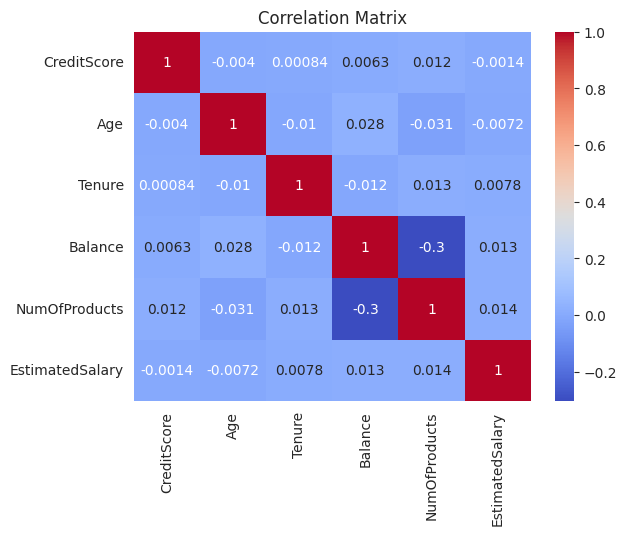

In [52]:
correlation_matrix = df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [53]:
cats = df.select_dtypes(include = "object").columns
cats

Index(['Geography', 'Gender', 'Card Type'], dtype='object')

In [54]:
encoder = OneHotEncoder(drop= "first")
x = encoder.fit_transform(df[cats]).toarray()
x = pd.DataFrame(x, columns = encoder.get_feature_names_out())
x = x.astype(int)
temp = df.drop(cats, axis=1)
df = pd.concat([temp,x], axis=1)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Gender_Male,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,42,2,0.00,1,1,1,101348.88,1,1,2,464,0,0,0,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,3,456,0,1,0,0,0,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,3,377,0,0,0,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,5,350,0,0,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,5,425,0,1,0,1,0,0


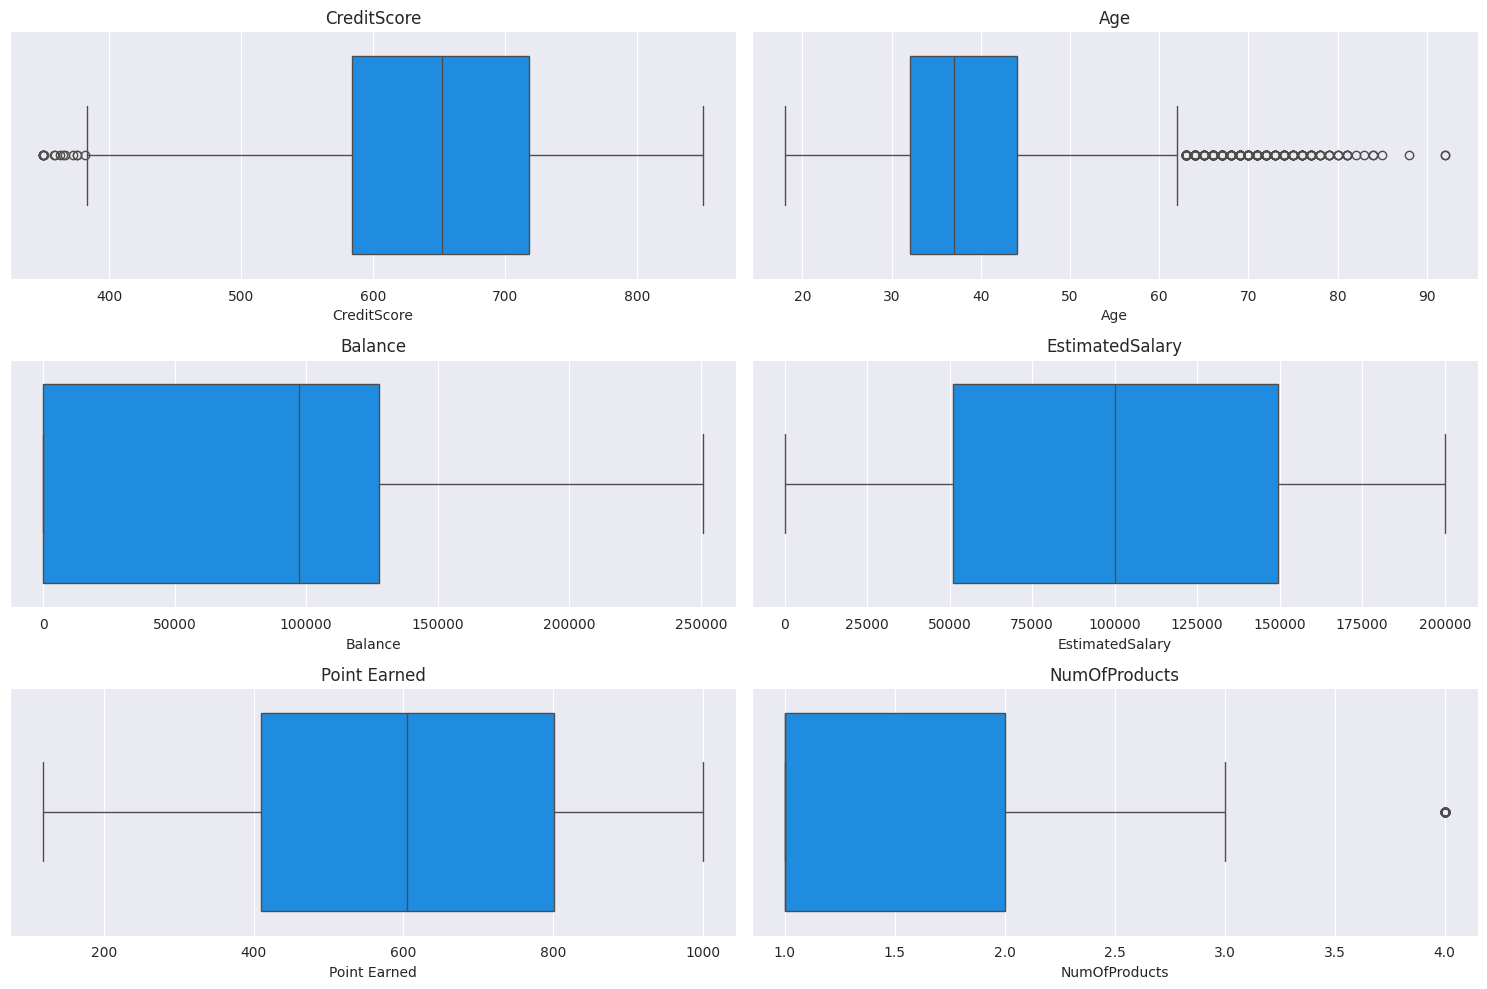

In [55]:
fig,axes = plt.subplots(nrows=3,ncols=2,figsize=(15,10))

sns.boxplot(x=df['CreditScore'],ax=axes[0,0],color='#0090FF')
axes[0,0].set_title('CreditScore')

sns.boxplot(x=df['Age'],ax=axes[0,1],color='#0090FF')
axes[0,1].set_title('Age')

sns.boxplot(x=df['Balance'],ax=axes[1,0],color='#0090FF')
axes[1,0].set_title('Balance')

sns.boxplot(x=df['EstimatedSalary'],ax=axes[1,1],color='#0090FF')
axes[1,1].set_title('EstimatedSalary')


sns.boxplot(x=df['Point Earned'],ax=axes[2,0],color='#0090FF')
axes[2,0].set_title('Point Earned')

sns.boxplot(x=df['NumOfProducts'],ax=axes[2,1],color='#0090FF')
axes[2,1].set_title('NumOfProducts')

plt.tight_layout()
plt.show()

##Гендель Аномалии


In [57]:
def remove_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_filtered = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
    return df_filtered

In [58]:
df_no_outliers = remove_outliers(df, 'Age')
df_no_outliers = remove_outliers(df_no_outliers, 'CreditScore')

In [59]:
df_no_outliers

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Gender_Male,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,42,2,0.00,1,1,1,101348.88,1,1,2,464,0,0,0,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,3,456,0,1,0,0,0,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,3,377,0,0,0,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,5,350,0,0,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,5,425,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1,300,0,0,1,0,0,0
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,5,771,0,0,1,0,1,0
9997,709,36,7,0.00,1,0,1,42085.58,1,1,3,564,0,0,0,0,0,1
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,2,339,1,0,1,1,0,0


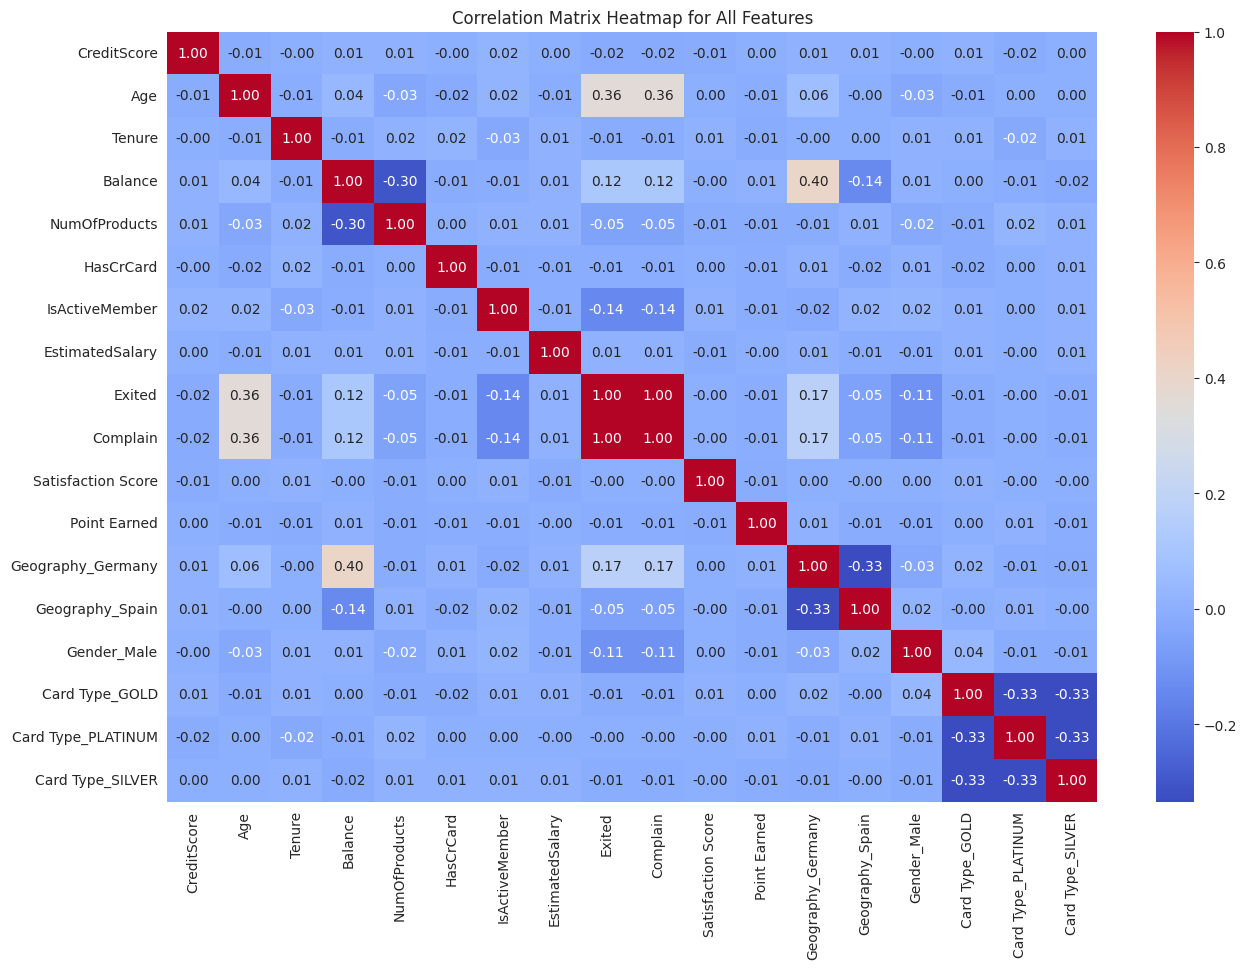

In [60]:
correlation_matrix = df_no_outliers.corr()

plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation Matrix Heatmap for All Features')
plt.show()

In [61]:
df_no_outliers['total_bal']=df_no_outliers['Balance']+df_no_outliers['EstimatedSalary']
df_no_outliers.drop(columns=['EstimatedSalary'],axis=1,inplace=True)

In [62]:
df.drop(columns=['Complain'],inplace=True)

In [63]:
from sklearn.model_selection import train_test_split
X = df.drop(columns = 'Exited')
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)


from imblearn.over_sampling import KMeansSMOTE
kmeans_smote = KMeansSMOTE(sampling_strategy = 0.4,cluster_balance_threshold=0.2)
X_train, y_train = kmeans_smote.fit_resample(X_train, y_train)

X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

print(accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))


0.7975
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1592
           1       0.51      0.32      0.39       408

    accuracy                           0.80      2000
   macro avg       0.67      0.62      0.63      2000
weighted avg       0.77      0.80      0.78      2000

0.8555
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1592
           1       0.74      0.44      0.56       408

    accuracy                           0.86      2000
   macro avg       0.81      0.70      0.73      2000
weighted avg       0.85      0.86      0.84      2000



In [64]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier


models = [SVC(), DecisionTreeClassifier(), GradientBoostingClassifier(), AdaBoostClassifier(), BaggingClassifier(), ExtraTreesClassifier(), KNeighborsClassifier(), SGDClassifier(), GaussianNB(), XGBClassifier()]
model_names = ['SVC', 'Decision Tree', 'Gradient Boosting', 'AdaBoost', 'Bagging', 'Extra Trees', 'KNN', 'SGD', 'Naive Bayes', 'XGBoost']
accuracy = []
for model in range(len(models)):
    clf = models[model]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))
    print(f'Accuracy of {model_names[model]} is {accuracy[model]}')




Accuracy of SVC is 0.853
Accuracy of Decision Tree is 0.7975
Accuracy of Gradient Boosting is 0.85
Accuracy of AdaBoost is 0.8295
Accuracy of Bagging is 0.835
Accuracy of Extra Trees is 0.846
Accuracy of KNN is 0.7955
Accuracy of SGD is 0.7885
Accuracy of Naive Bayes is 0.8035
Accuracy of XGBoost is 0.8525


In [65]:
X_train.shape

(8923, 16)

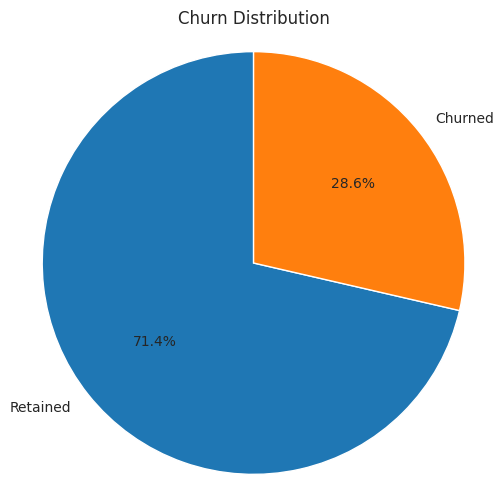

In [66]:
train = pd.concat([X_train_copy,y_train],axis=1)

plt.figure(figsize=(6, 6))
churn_counts = train['Exited'].value_counts()
plt.pie(churn_counts, labels=['Retained', 'Churned'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Churn Distribution')
plt.show()


In [67]:
train[['Exited']].value_counts()

,count
Exited,
0,6370
1,2553


In [68]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import f1_score

models = [
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(),
    KNeighborsClassifier(),
    LogisticRegression(),
    DecisionTreeClassifier(),
    GaussianNB()
]

params = [
    {'n_estimators': [50, 100, 200, 300], 'max_depth': [3, 5, 7, 9]},
    {'n_estimators': [50, 100, 200, 300], 'learning_rate': [0.01, 0.1, 1, 10]},
    {'n_estimators': [50, 100, 200, 300], 'learning_rate': [0.01, 0.1, 1, 10]},
    {'n_estimators': [50, 100, 200, 300], 'learning_rate': [0.01, 0.1, 1, 10], 'max_depth': [3, 5, 7], 'reg_alpha': [0, 0.1, 1], 'reg_lambda': [0, 0.1, 1]},
    {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']},
    {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2', 'elasticnet']},
    {'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, 7, 9, 11, 13, 15]},
    {}
]

df_results = pd.DataFrame()

for i, model in enumerate(models):
    grid = RandomizedSearchCV(model, params[i], cv=8, scoring='f1', n_jobs=-1)
    grid.fit(X_train, y_train)
    y_pred = grid.best_estimator_.predict(X_test)

    results = {
        'Model': model.__class__.__name__,
        'Best Parameters': [grid.best_params_],
        'Best CV Score': [grid.best_score_],
        'Test Accuracy': [accuracy_score(y_test, y_pred)],
        'Train Accuracy': [grid.best_estimator_.score(X_train, y_train)],
        'F1 Score': [f1_score(y_test, y_pred)],
        'Scaler': 'StandardScaler',
        'Cm': [confusion_matrix(y_test, y_pred)]
    }

    df_results = pd.concat([df_results, pd.DataFrame(results)], ignore_index=True)
    print(f'{model.__class__.__name__} done.')

print(df_results)



RandomForestClassifier done.
AdaBoostClassifier done.
GradientBoostingClassifier done.
XGBClassifier done.
KNeighborsClassifier done.


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
56 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
32 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solver

LogisticRegression done.
DecisionTreeClassifier done.


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


GaussianNB done.
                        Model  \
0      RandomForestClassifier   
1          AdaBoostClassifier   
2  GradientBoostingClassifier   
3               XGBClassifier   
4        KNeighborsClassifier   
5          LogisticRegression   
6      DecisionTreeClassifier   
7                  GaussianNB   

                                     Best Parameters  Best CV Score  \
0              {'n_estimators': 300, 'max_depth': 9}       0.690097   
1          {'n_estimators': 300, 'learning_rate': 1}       0.679565   
2        {'n_estimators': 300, 'learning_rate': 0.1}       0.717082   
3  {'reg_lambda': 0, 'reg_alpha': 0, 'n_estimator...       0.704939   
4  {'weights': 'distance', 'n_neighbors': 3, 'alg...       0.615124   
5                         {'penalty': 'l2', 'C': 10}       0.571021   
6              {'max_depth': 9, 'criterion': 'gini'}       0.652065   
7                                                 {}       0.611760   

   Test Accuracy  Train Accuracy  F1 Score   

In [69]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_copy)
X_test = scaler.transform(X_test_copy)



In [70]:
models = [
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(),
    KNeighborsClassifier(),
    LogisticRegression(),
    DecisionTreeClassifier(),
    GaussianNB()
]

params = [
    {'n_estimators': [50, 100, 200, 300], 'max_depth': [3, 5, 7, 9]},
    {'n_estimators': [50, 100, 200, 300], 'learning_rate': [0.01, 0.1, 1, 10]},
    {'n_estimators': [50, 100, 200, 300], 'learning_rate': [0.01, 0.1, 1, 10]},
    {'n_estimators': [50, 100, 200, 300], 'learning_rate': [0.01, 0.1, 1, 10], 'max_depth': [3, 5, 7], 'reg_alpha': [0, 0.1, 1], 'reg_lambda': [0, 0.1, 1]},
    {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']},
    {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2', 'elasticnet']},
    {'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, 7, 9, 11, 13, 15]},
    {}
]

for i, model in enumerate(models):
    grid = RandomizedSearchCV(model, params[i], cv=8, scoring='f1', n_jobs=-1)
    grid.fit(X_train, y_train)
    y_pred = grid.best_estimator_.predict(X_test)

    results = {
        'Model': model.__class__.__name__,
        'Best Parameters': [grid.best_params_],
        'Best CV Score': [grid.best_score_],
        'Test Accuracy': [accuracy_score(y_test, y_pred)],
        'Train Accuracy': [grid.best_estimator_.score(X_train, y_train)],
        'F1 Score': [f1_score(y_test, y_pred)],
        'Scaler': 'MinMaxScaler',
        'Cm': [confusion_matrix(y_test, y_pred)]
    }

    df_results = pd.concat([df_results, pd.DataFrame(results)], ignore_index=True)
    print(f'{model.__class__.__name__} done.')

print(df_results)



RandomForestClassifier done.
AdaBoostClassifier done.
GradientBoostingClassifier done.
XGBClassifier done.
KNeighborsClassifier done.


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
48 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
32 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solver

LogisticRegression done.
DecisionTreeClassifier done.


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


GaussianNB done.
                         Model  \
0       RandomForestClassifier   
1           AdaBoostClassifier   
2   GradientBoostingClassifier   
3                XGBClassifier   
4         KNeighborsClassifier   
5           LogisticRegression   
6       DecisionTreeClassifier   
7                   GaussianNB   
8       RandomForestClassifier   
9           AdaBoostClassifier   
10  GradientBoostingClassifier   
11               XGBClassifier   
12        KNeighborsClassifier   
13          LogisticRegression   
14      DecisionTreeClassifier   
15                  GaussianNB   

                                      Best Parameters  Best CV Score  \
0               {'n_estimators': 300, 'max_depth': 9}       0.690097   
1           {'n_estimators': 300, 'learning_rate': 1}       0.679565   
2         {'n_estimators': 300, 'learning_rate': 0.1}       0.717082   
3   {'reg_lambda': 0, 'reg_alpha': 0, 'n_estimator...       0.704939   
4   {'weights': 'distance', 'n_neighbors': 3

In [71]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train = scaler.fit_transform(X_train_copy)
X_test = scaler.transform(X_test_copy)

In [72]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import f1_score

models = [
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(),
    KNeighborsClassifier(),
    LogisticRegression(),
    DecisionTreeClassifier(),
    GaussianNB()
]

params = [
    {'n_estimators': [50, 100, 200, 300], 'max_depth': [3, 5, 7, 9]},
    {'n_estimators': [50, 100, 200, 300], 'learning_rate': [0.01, 0.1, 1, 10]},
    {'n_estimators': [50, 100, 200, 300], 'learning_rate': [0.01, 0.1, 1, 10]},
    {'n_estimators': [50, 100, 200, 300], 'learning_rate': [0.01, 0.1, 1, 10], 'max_depth': [3, 5, 7], 'reg_alpha': [0, 0.1, 1], 'reg_lambda': [0, 0.1, 1]},
    {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']},
    {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2', 'elasticnet']},
    {'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, 7, 9, 11, 13, 15]},
    {}
]

for i, model in enumerate(models):
    grid = RandomizedSearchCV(model, params[i], cv=8, scoring='f1', n_jobs=-1)
    grid.fit(X_train, y_train)
    y_pred = grid.best_estimator_.predict(X_test)

    results = {
        'Model': model.__class__.__name__,
        'Best Parameters': [grid.best_params_],
        'Best CV Score': [grid.best_score_],
        'Test Accuracy': [accuracy_score(y_test, y_pred)],
        'Train Accuracy': [grid.best_estimator_.score(X_train, y_train)],
        'F1 Score': [f1_score(y_test, y_pred)],
        'Scaler': 'RobustScaler',
        'Cm': [confusion_matrix(y_test, y_pred)]
    }

    df_results = pd.concat([df_results, pd.DataFrame(results)], ignore_index=True)
    print(f'{model.__class__.__name__} done.')

print(df_results)



RandomForestClassifier done.
AdaBoostClassifier done.
GradientBoostingClassifier done.
XGBClassifier done.
KNeighborsClassifier done.


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
48 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solver

LogisticRegression done.
DecisionTreeClassifier done.


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


GaussianNB done.
                         Model  \
0       RandomForestClassifier   
1           AdaBoostClassifier   
2   GradientBoostingClassifier   
3                XGBClassifier   
4         KNeighborsClassifier   
5           LogisticRegression   
6       DecisionTreeClassifier   
7                   GaussianNB   
8       RandomForestClassifier   
9           AdaBoostClassifier   
10  GradientBoostingClassifier   
11               XGBClassifier   
12        KNeighborsClassifier   
13          LogisticRegression   
14      DecisionTreeClassifier   
15                  GaussianNB   
16      RandomForestClassifier   
17          AdaBoostClassifier   
18  GradientBoostingClassifier   
19               XGBClassifier   
20        KNeighborsClassifier   
21          LogisticRegression   
22      DecisionTreeClassifier   
23                  GaussianNB   

                                      Best Parameters  Best CV Score  \
0               {'n_estimators': 300, 'max_depth': 9}       

In [73]:
df_results.sort_values(by=['Model', 'Test Accuracy'], ascending=[True, False], inplace=True)
df_results.reset_index(drop=True, inplace=True)

print(df_results)

                         Model  \
0           AdaBoostClassifier   
1           AdaBoostClassifier   
2           AdaBoostClassifier   
3       DecisionTreeClassifier   
4       DecisionTreeClassifier   
5       DecisionTreeClassifier   
6                   GaussianNB   
7                   GaussianNB   
8                   GaussianNB   
9   GradientBoostingClassifier   
10  GradientBoostingClassifier   
11  GradientBoostingClassifier   
12        KNeighborsClassifier   
13        KNeighborsClassifier   
14        KNeighborsClassifier   
15          LogisticRegression   
16          LogisticRegression   
17          LogisticRegression   
18      RandomForestClassifier   
19      RandomForestClassifier   
20      RandomForestClassifier   
21               XGBClassifier   
22               XGBClassifier   
23               XGBClassifier   

                                      Best Parameters  Best CV Score  \
0           {'n_estimators': 300, 'learning_rate': 1}       0.679565   
1    

In [74]:
display(df_results)

,Model,Best Parameters,Best CV Score,Test Accuracy,Train Accuracy,F1 Score,Scaler,Cm
0,AdaBoostClassifier,"{'n_estimators': 300, 'learning_rate': 1}",0.679565,0.8355,0.846128,0.542420,StandardScaler,"[[1476, 116], [213, 195]]"
1,AdaBoostClassifier,"{'n_estimators': 200, 'learning_rate': 1}",0.670491,0.8350,0.846352,0.539106,MinMaxScaler,"[[1477, 115], [215, 193]]"
2,AdaBoostClassifier,"{'n_estimators': 200, 'learning_rate': 1}",0.670491,0.8350,0.846352,0.539106,RobustScaler,"[[1477, 115], [215, 193]]"
3,DecisionTreeClassifier,"{'max_depth': 9, 'criterion': 'gini'}",0.651869,0.8265,0.894654,0.520055,MinMaxScaler,"[[1465, 127], [220, 188]]"
4,DecisionTreeClassifier,"{'max_depth': 9, 'criterion': 'gini'}",0.652065,0.8250,0.894654,0.515235,StandardScaler,"[[1464, 128], [222, 186]]"
5,DecisionTreeClassifier,"{'max_depth': 9, 'criterion': 'gini'}",0.651050,0.8250,0.894654,0.516575,RobustScaler,"[[1463, 129], [221, 187]]"
6,GaussianNB,{},0.611760,0.8035,0.809705,0.471063,StandardScaler,"[[1432, 160], [233, 175]]"
7,GaussianNB,{},0.611760,0.8035,0.809705,0.471063,MinMaxScaler,"[[1432, 160], [233, 175]]"
8,GaussianNB,{},0.611760,0.8035,0.809705,0.471063,RobustScaler,"[[1432, 160], [233, 175]]"
9,GradientBoostingClassifier,"{'n_estimators': 300, 'learning_rate': 0.1}",0.717082,0.8465,0.894878,0.560801,StandardScaler,"[[1497, 95], [212, 196]]"


In [75]:
from sklearn.ensemble import StackingClassifier

base_models = [

    ('Logistic Regression', LogisticRegression(C=0.001, penalty='l2', solver='liblinear')),

    ('KNN', KNeighborsClassifier(n_neighbors=3)),

    ('Decision Tree', DecisionTreeClassifier(max_depth=12)),

    ('Random Forest', RandomForestClassifier(max_depth=9, n_estimators=50)),

    ('SVC', SVC(C=10, kernel='rbf')),

    ('AdaBoost', AdaBoostClassifier(learning_rate=1, n_estimators=200)),

    ('Gradient Boosting', GradientBoostingClassifier(learning_rate=0.1, n_estimators=300)),

    ('XGBoost', XGBClassifier(learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0.1, reg_lambda=1))

]

stacking_clf = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())

stacking_clf.fit(X_train, y_train)

y_pred = stacking_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f'Stacking Classifier Accuracy: {accuracy}')

results = {
    'Model': 'Stacking Classifier',
    'Best Parameters': ['N/A'],
    'Best CV Score': ['N/A'],
    'Test Accuracy': [accuracy],
    'Train Accuracy': [stacking_clf.score(X_train, y_train)],
    'F1 Score': [f1_score(y_test, y_pred)],
    'Scaler': 'RobustScaler'
}

df_results = pd.concat([df_results, pd.DataFrame(results)], ignore_index=True)

Stacking Classifier Accuracy: 0.8495


In [76]:
base_models = [

    ('Logistic Regression', LogisticRegression(C=0.001, penalty='l2', solver='liblinear')),

    ('KNN', KNeighborsClassifier(n_neighbors=3)),

    ('Decision Tree', DecisionTreeClassifier(max_depth=12)),

    ('Random Forest', RandomForestClassifier(max_depth=9, n_estimators=50)),

    ('SVC', SVC(C=10, kernel='rbf')),

    ('AdaBoost', AdaBoostClassifier(learning_rate=1, n_estimators=200)),

    ('Gradient Boosting', GradientBoostingClassifier(learning_rate=0.1, n_estimators=300)),

    ('XGBoost', XGBClassifier(learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0.1, reg_lambda=1))

]

voting_clf = VotingClassifier(estimators=base_models)

voting_clf.fit(X_train, y_train)

y_pred = voting_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f'Voting Classifier Accuracy: {accuracy}')

from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred))

results = {
    'Model': 'Voting Classifier',
    'Best Parameters': ['N/A'],
    'Best CV Score': ['N/A'],
    'Test Accuracy': [accuracy],
    'Train Accuracy': ['N/A'],
    'F1 Score': [f1_score(y_test, y_pred)],
    'Scaler': 'RobustScaler',
    'Cm': [confusion_matrix(y_test, y_pred)]
}

df_results = pd.concat([df_results, pd.DataFrame(results)], ignore_index=True)

Voting Classifier Accuracy: 0.853
0.6943910730121194


In [77]:
display(df_results)

,Model,Best Parameters,Best CV Score,Test Accuracy,Train Accuracy,F1 Score,Scaler,Cm
0,AdaBoostClassifier,"{'n_estimators': 300, 'learning_rate': 1}",0.679565,0.8355,0.846128,0.542420,StandardScaler,"[[1476, 116], [213, 195]]"
1,AdaBoostClassifier,"{'n_estimators': 200, 'learning_rate': 1}",0.670491,0.8350,0.846352,0.539106,MinMaxScaler,"[[1477, 115], [215, 193]]"
2,AdaBoostClassifier,"{'n_estimators': 200, 'learning_rate': 1}",0.670491,0.8350,0.846352,0.539106,RobustScaler,"[[1477, 115], [215, 193]]"
3,DecisionTreeClassifier,"{'max_depth': 9, 'criterion': 'gini'}",0.651869,0.8265,0.894654,0.520055,MinMaxScaler,"[[1465, 127], [220, 188]]"
4,DecisionTreeClassifier,"{'max_depth': 9, 'criterion': 'gini'}",0.652065,0.8250,0.894654,0.515235,StandardScaler,"[[1464, 128], [222, 186]]"
5,DecisionTreeClassifier,"{'max_depth': 9, 'criterion': 'gini'}",0.65105,0.8250,0.894654,0.516575,RobustScaler,"[[1463, 129], [221, 187]]"
6,GaussianNB,{},0.61176,0.8035,0.809705,0.471063,StandardScaler,"[[1432, 160], [233, 175]]"
7,GaussianNB,{},0.61176,0.8035,0.809705,0.471063,MinMaxScaler,"[[1432, 160], [233, 175]]"
8,GaussianNB,{},0.61176,0.8035,0.809705,0.471063,RobustScaler,"[[1432, 160], [233, 175]]"
9,GradientBoostingClassifier,"{'n_estimators': 300, 'learning_rate': 0.1}",0.717082,0.8465,0.894878,0.560801,StandardScaler,"[[1497, 95], [212, 196]]"


<ipython-input-78-06a772278285>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_results, x='Model', y='Test Accuracy', palette='viridis')


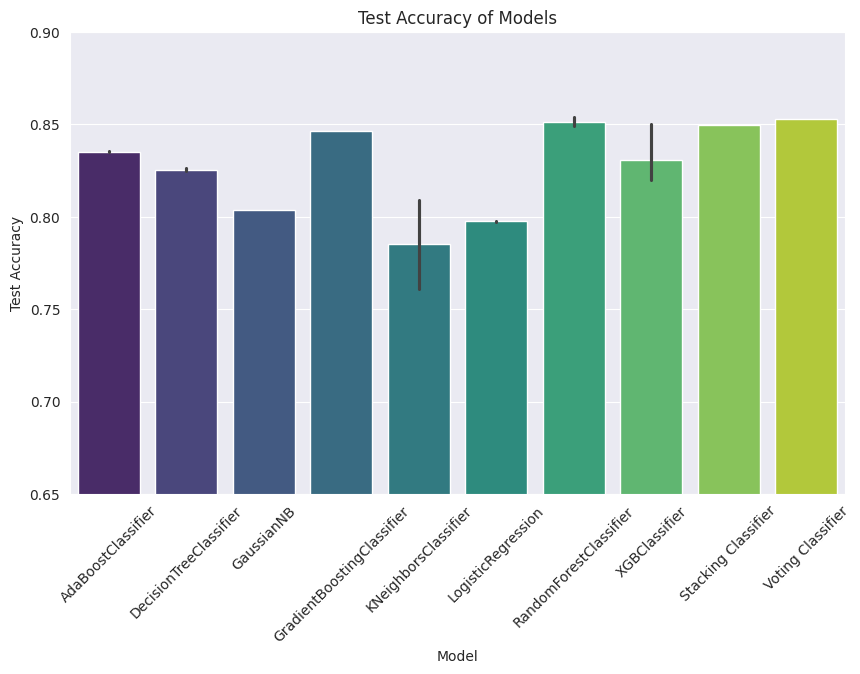

In [78]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_results, x='Model', y='Test Accuracy', palette='viridis')
plt.xticks(rotation=45)
plt.title('Test Accuracy of Models')
plt.ylim(0.65, 0.9)
plt.show()

<ipython-input-79-5e1ce06aa88a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_results, x='Scaler', y='Test Accuracy', palette='viridis')


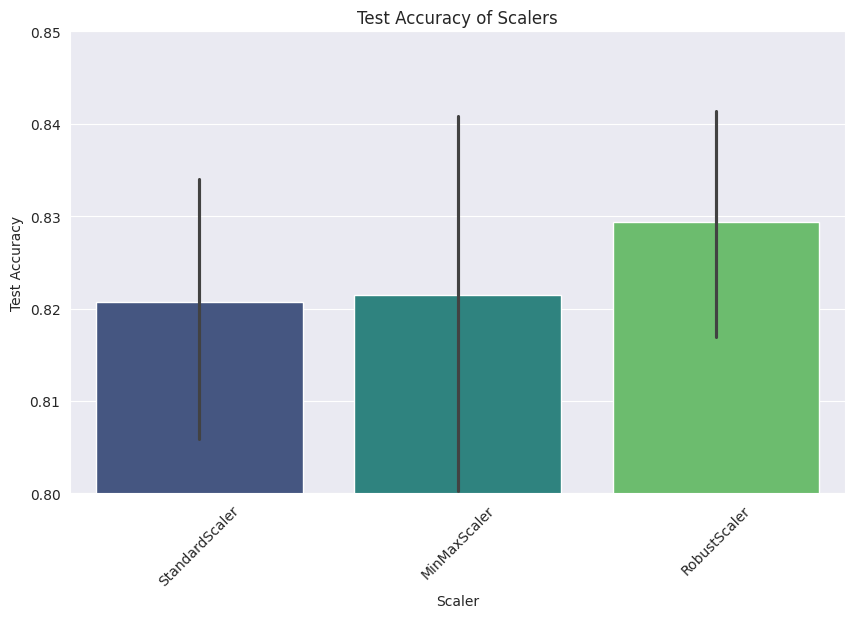

In [79]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_results, x='Scaler', y='Test Accuracy', palette='viridis')
plt.xticks(rotation=45)
plt.title('Test Accuracy of Scalers')
plt.ylim(0.8, 0.85)
plt.show()

<ipython-input-80-6b43a054bc04>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_results, x='Model', y='F1 Score', palette='viridis')


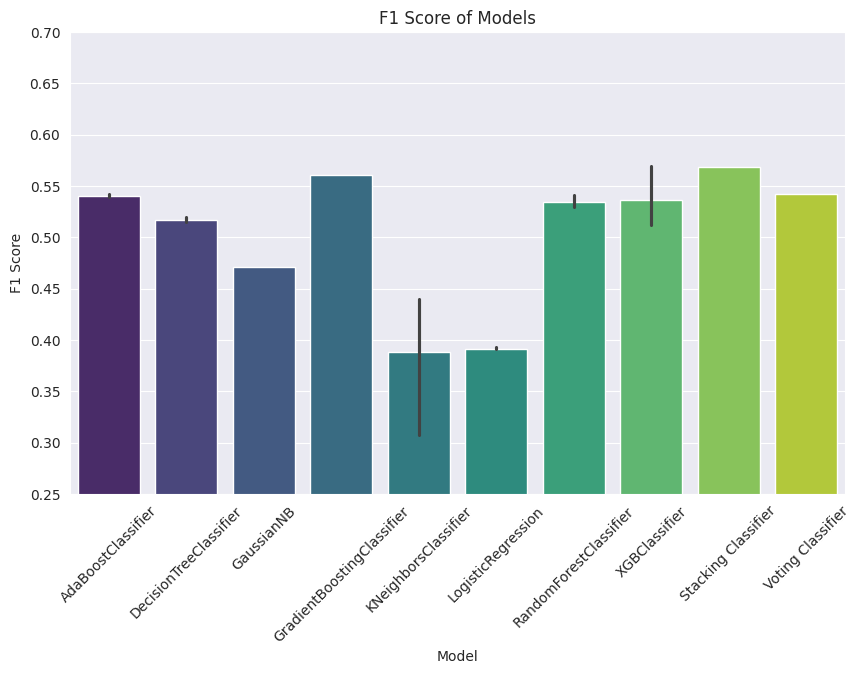

In [80]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_results, x='Model', y='F1 Score', palette='viridis')
plt.xticks(rotation=45)
plt.title('F1 Score of Models')
plt.ylim(0.25, 0.7)
plt.show()


In [81]:
pd.set_option('display.max_colwidth', None)
df_results

,Model,Best Parameters,Best CV Score,Test Accuracy,Train Accuracy,F1 Score,Scaler,Cm
0,AdaBoostClassifier,"{'n_estimators': 300, 'learning_rate': 1}",0.679565,0.8355,0.846128,0.542420,StandardScaler,"[[1476, 116], [213, 195]]"
1,AdaBoostClassifier,"{'n_estimators': 200, 'learning_rate': 1}",0.670491,0.8350,0.846352,0.539106,MinMaxScaler,"[[1477, 115], [215, 193]]"
2,AdaBoostClassifier,"{'n_estimators': 200, 'learning_rate': 1}",0.670491,0.8350,0.846352,0.539106,RobustScaler,"[[1477, 115], [215, 193]]"
3,DecisionTreeClassifier,"{'max_depth': 9, 'criterion': 'gini'}",0.651869,0.8265,0.894654,0.520055,MinMaxScaler,"[[1465, 127], [220, 188]]"
4,DecisionTreeClassifier,"{'max_depth': 9, 'criterion': 'gini'}",0.652065,0.8250,0.894654,0.515235,StandardScaler,"[[1464, 128], [222, 186]]"
5,DecisionTreeClassifier,"{'max_depth': 9, 'criterion': 'gini'}",0.65105,0.8250,0.894654,0.516575,RobustScaler,"[[1463, 129], [221, 187]]"
6,GaussianNB,{},0.61176,0.8035,0.809705,0.471063,StandardScaler,"[[1432, 160], [233, 175]]"
7,GaussianNB,{},0.61176,0.8035,0.809705,0.471063,MinMaxScaler,"[[1432, 160], [233, 175]]"
8,GaussianNB,{},0.61176,0.8035,0.809705,0.471063,RobustScaler,"[[1432, 160], [233, 175]]"
9,GradientBoostingClassifier,"{'n_estimators': 300, 'learning_rate': 0.1}",0.717082,0.8465,0.894878,0.560801,StandardScaler,"[[1497, 95], [212, 196]]"


In [82]:
df_results.sort_values(by=['Test Accuracy'], ascending=False, inplace=True)
df_results.reset_index(drop=True, inplace=True)

display(df_results)

,Model,Best Parameters,Best CV Score,Test Accuracy,Train Accuracy,F1 Score,Scaler,Cm
0,RandomForestClassifier,"{'n_estimators': 50, 'max_depth': 9}",0.68997,0.8540,0.899585,0.540881,RobustScaler,"[[1536, 56], [236, 172]]"
1,Voting Classifier,N/A,N/A,0.8530,N/A,0.542056,RobustScaler,"[[1532, 60], [234, 174]]"
2,RandomForestClassifier,"{'n_estimators': 200, 'max_depth': 9}",0.690119,0.8515,0.902723,0.532283,MinMaxScaler,"[[1534, 58], [239, 169]]"
3,XGBClassifier,"{'reg_lambda': 0, 'reg_alpha': 0, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1}",0.711305,0.8505,0.884008,0.569784,MinMaxScaler,"[[1503, 89], [210, 198]]"
4,Stacking Classifier,N/A,N/A,0.8495,0.912249,0.568149,RobustScaler,NaN
5,RandomForestClassifier,"{'n_estimators': 300, 'max_depth': 9}",0.690097,0.8490,0.903732,0.529595,StandardScaler,"[[1528, 64], [238, 170]]"
6,GradientBoostingClassifier,"{'n_estimators': 300, 'learning_rate': 0.1}",0.717231,0.8465,0.894878,0.560801,RobustScaler,"[[1497, 95], [212, 196]]"
7,GradientBoostingClassifier,"{'n_estimators': 300, 'learning_rate': 0.1}",0.716932,0.8465,0.894878,0.560801,MinMaxScaler,"[[1497, 95], [212, 196]]"
8,GradientBoostingClassifier,"{'n_estimators': 300, 'learning_rate': 0.1}",0.717082,0.8465,0.894878,0.560801,StandardScaler,"[[1497, 95], [212, 196]]"
9,AdaBoostClassifier,"{'n_estimators': 300, 'learning_rate': 1}",0.679565,0.8355,0.846128,0.542420,StandardScaler,"[[1476, 116], [213, 195]]"


In [83]:
best = df_results.iloc[0]
best

,0
Model,RandomForestClassifier
Best Parameters,"{'n_estimators': 50, 'max_depth': 9}"
Best CV Score,0.68997
Test Accuracy,0.854
Train Accuracy,0.899585
F1 Score,0.540881
Scaler,RobustScaler
Cm,"[[1536, 56], [236, 172]]"
